<center><h1 style="color: rgb(0, 91, 94);">Quantum Computing</h1></center>


<h2 style="color: rgb(0, 91, 94);">Introduction</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

Within this repository, we will be exploring <b>Quantum Computing</b>. The repository will contain a general definition of quantum computing and its basic concepts. To understand the basic concepts, we will be using the help of the Qiskit documentation to fully understand quantum computing in action.

<h2 style="color: rgb(0, 91, 94);">Quantum Computing: Definition</h2>
<hr style="border-top: 1px solid rgb(0, 91, 94);" />

Quantum computing can be described as a technology in which <i>"harnesses the laws of quantum mechanics to solve problems too complex for classical computers"</i>.<sup><a href="#references">[1]</a></sup>  

How is a quantum computer any different from our classical computers? It is known that traditional computers operate with bits (or called classical bits in relation to quantum computing), where a bit can takes either a value of 0 or 1.  Quantum computers however, actually operate using <b>quantum bits</b> (also known as qubits), which can take a value of 0 or 1,  or a combination of values in between, existing at the same time. <sup><a href="#references">[2]</a></sup>  

This allows for a much more powerful computational tool. Qubits are very complex and quite unpredictable, so the idea of a useful and fully-functioning quantum computer are still not brought to full realisation as of yet. <sup><a href="#references">[3]</a></sup> However, we can still begin to explore the logic behind it. 


<img src="https://www.austinchronicle.com/binary/085f/screens_feature2.jpg"><a href="https://www.austinchronicle.com/binary/085f/screens_feature2.jpg"><center><b>Source</b></center></a></img>

<h2 style="color: rgb(0, 91, 94);">Quantum Computing: Circuits</h2>
<hr style="border-top: 1px solid rgb(0, 91, 94);" />

When using classical bits or qubit bits, it is important for us to be able to change their states, for the purposes of getting an output we want. For this we use what is called <i>circuits</i>, which we can represent in a diagram. <sup><a href="#references">[4]</a></sup>


We can see a representation of a circuit in a classical computer below:

<img src="https://stem.mitre.org/quantum/quantum-concepts/images/circuits-1.png"><a href="https://stem.mitre.org/quantum/quantum-concepts/images/circuits-1.png"><center><b>Source</b></center></a></img>

We can also represent a circuit in quantum computing in a similiar way, although with different notations and input. 

Let us begin by creating a simple circuit, with the help of <i>Qiskit</i>. <sup><a href="#references">[5]</a></sup>

In [1]:
# Import the necessary Qiskit libraries
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram,  plot_bloch_multivector

In [2]:
# Create a circuit with 8 qubits and 8 outputs
qc_output = QuantumCircuit(8)


# Extracts outputs within a quantum circuit
# Adds measurement to each qubit and adds classical bits to write output to
qc_output.measure_all()

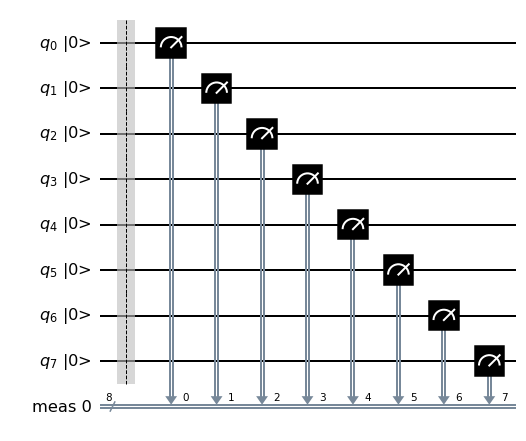

In [3]:
# Draw the circuit
qc_output.draw(output="mpl",initial_state=True) 

Let us explain the above circuit and break down the meaning of it: <sup><a href="#references">[4]</a></sup>
    
<ul>
    <li>Horizontal lines represent a single qubit</li>
    <li>The value at the left indicates the qubit number and it's current state (the current state is 0)</li>
    <li>We can view the diagram to be divided into columns, where each column represents a step in the circuit</li>
    <li> The horizontal represents <i>time</i> and the vertical axis represents qubits
</ul>

Each qubit can have a gate applied to it. These gates are what actually change the state of the qubit. The above output of the circuit is always 0, since we do not ever change its state. Let's output the values in a histogram.

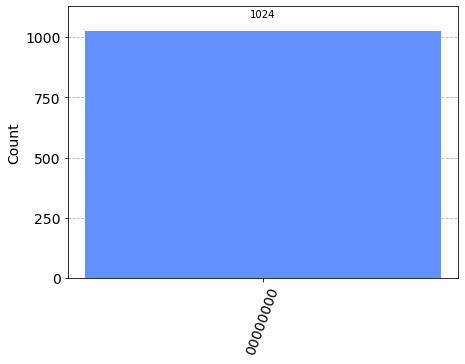

In [4]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc_output).result()
counts = result.get_counts()
plot_histogram(counts)

As the Qiskit documentation explains, the reason for running a circuit many times is because there is a <u>randomness involved with quantum computers</u>, which is why they are so difficult to work with currently. Luckily, since the outputs are always 0 in the above instance, there is no change in the results.

Let us introduce an <b>X gate</b> (a NOT gate in classical computing) to the above circuit and see what occurs:

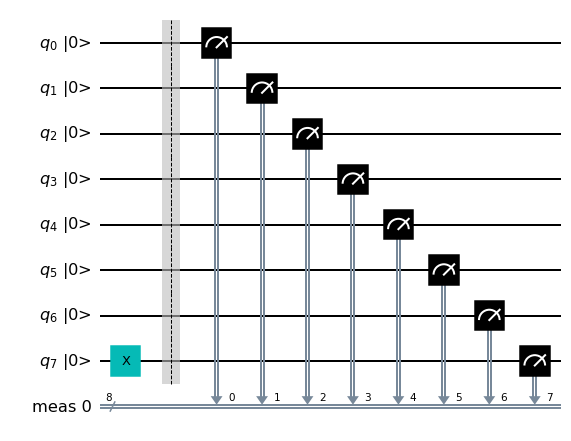

In [5]:
# Create a circuit with 8 qubits and 8 outputs
qc_encode = QuantumCircuit(8)

# Apply an x gate to the 7th qubit
qc_encode.x(7)

# Draw
qc_encode.measure_all()
qc_encode.draw(output="mpl",initial_state=True) 

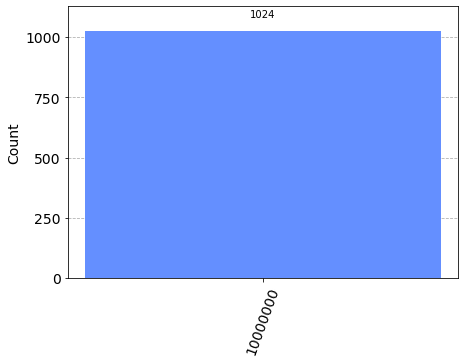

In [6]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc_encode).result()
counts = result.get_counts()
plot_histogram(counts)

Since we flipped the bit, which originates from the 7th qubit, we can see the output changes to the string $10000000$, which represents the value of 128 in binary.

<h2 style="color: rgb(0, 91, 94);">Quantum Computing: Gates</h2>
<hr style="border-top: 1px solid rgb(0, 91, 94);" />

Let's take a further look at single Qubit gates and what they do within a circuit. <sup><a href="#references">[6]</a></sup> We will also use a helpful article from <i>Medium</i> which helps to visualize the effects of these gates.<sup><a href="#references">[7]</a></sup> 

<h3 style="color: rgb(0, 91, 94);">Pauli Gates</h3>
<hr style="border-top: 1px solid rgb(0, 91, 94);" />

<h4 style="color: rgb(0, 91, 94);">X Gate</h4>
<hr style="border-top: 1px solid rgb(0, 91, 94);" />

An <b>X gate</b> (quantum equivalent of the classical NOT gate) can be represented by the following matrix:

$ X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} = | 0 \rangle \langle 1 | + | 1 \rangle \langle 0 |$

We can view its effects on a qubit by multiplying the qubits initial state by the gate itself as follows:

$ X | 0 \rangle = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} \begin{bmatrix} 1 \\  0 \end{bmatrix} = \begin{bmatrix} 0 \\  1 \end{bmatrix} = | 1 \rangle$

Let us visualize this and it's effect on a $|0 \rangle$ qubit.


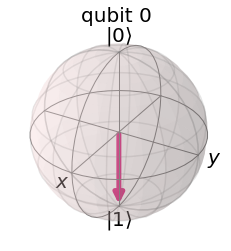

In [7]:
# X-gate on a |0> qubit
qc = QuantumCircuit(1)
qc.x(0)
qc.draw()

qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

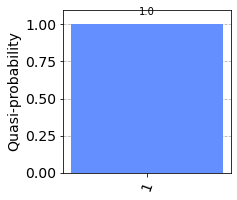

In [8]:
# Get a simulator
sim = Aer.get_backend('aer_simulator')

# Simulate the circuit
result = sim.run(qc).result().get_counts()

# Plot the results
plot_histogram(result, figsize=(3, 3))

We can see that it changes the initial state of the qubit to $|1 \rangle$ 

<h4 style="color: rgb(0, 91, 94);">Z Gates</h4>
<hr style="border-top: 1px solid rgb(0, 91, 94);" />

A Z gate essentially acts as a 'phase flip' gate that causes a rotation around the z-axis by $\pi$ radians. <sup><a href="#references">[7]</a></sup>

$ Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} \qquad | 0 \rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$

$ Z | 0 \rangle = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$

A Z gate does not effect any qubits in the state of $|0 \rangle$ or $|1 \rangle$, instead it flips a $|+\rangle$ to  $|-\rangle$ and vice-versa. Let us visualize this in the same way in which we visualized the use of the X gate.

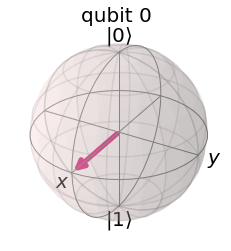

In [11]:
import numpy as np

qc = QuantumCircuit(1)
initial_state = [1/np.sqrt(2),1/np.sqrt(2)]   
qc.initialize(initial_state, 0)

qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

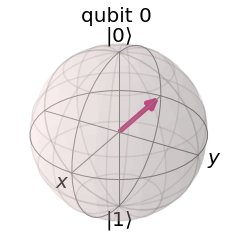

In [12]:
# X-gate on a |0> qubit
qc = QuantumCircuit(1)
initial_state = [1/np.sqrt(2),1/np.sqrt(2)]   
qc.initialize(initial_state, 0)
qc.z(0)
qc.draw()

qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

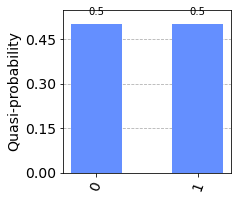

In [13]:
# Get a simulator
sim = Aer.get_backend('aer_simulator')

# Simulate the circuit
result = sim.run(qc).result().get_counts()

# Plot the results
plot_histogram(result, figsize=(3, 3))

<h4 style="color: rgb(0, 91, 94);">H Gate</h4>
<hr style="border-top: 1px solid rgb(0, 91, 94);" />

A H gate, also known as a Hadamard gate, is quite commonly used in quantum computing. 

$ H = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} \qquad | 0 \rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$

$ H | 0 \rangle = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \end{bmatrix}$

Essentially what a H gate does in this scenario is it puts a qubit within the $| 0 \rangle$ state into a new state where the probability of measuring 0 is $\frac{1}{2}$ and the probability of measuring 1 is $\frac{1}{2}$ <sup><a href="#references">[8]</a></sup> 

This puts the qubit into a <i>superposition</i> state, as shown in the below diagram.


<img src="https://freecontent.manning.com/wp-content/uploads/all-about-hadamard-gates_01.png"><a href="https://freecontent.manning.com/wp-content/uploads/all-about-hadamard-gates_01.png"><center><b>Source</b></center></a></img>

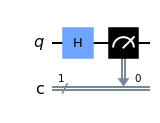

In [49]:
# From class notes
# Create a circuit.
circuit = QuantumCircuit(1, 1)

# Add a gate.
circuit.h(0)

# Measure.
circuit.measure(0, 0)

# Draw the circuit
circuit.draw(output='mpl')

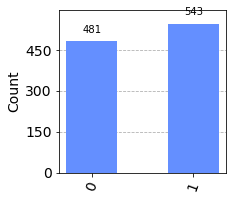

In [51]:
# From class notes
# Get a simulator.
sim = Aer.get_backend('aer_simulator')

# Simulate the circuit.
result = sim.run(circuit).result().get_counts()

# Histogram.
plot_histogram(result, figsize=(3, 3))

If the above is executed a manner of times we can see the values of the bits continously change.

<h2 style="color: rgb(0, 91, 94);">Quantum Computing: Application and Usage</h2>
<hr style="border-top: 1px solid rgb(0, 91, 94);" />

We've looked at some quantum gates and explained abit about what Quantum Computing is, but what is its application currently? 

We can see quantum computing used in the a few fields currently: <sup><a href="#references">[9]</a></sup> 

<ul>
    <li>Cybersecurity</li>
    <li>Artificial Intelligence</li>
    <li>Solar capture</li>
    <li>Traffic optimization</li>
    <li>Financial modeling</li>    
</ul>

We can even see many companies working with quantum computer as well:

<ul>
    <li>IBM Quantum <sup><a href="#references">[10]</a></sup> </li> 
    <li>Google Quantum AI <sup><a href="#references">[11]</a></sup> </li> 
    <li>Microsoft Azure Quantum <sup><a href="#references">[12]</a></sup> </li>   
</ul>

The future ahead for quantum computing is quite exciting and will be a huge leap in technological achievement when it becomes more stable.

<h2 style="color: rgb(0, 91, 94);">References</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

<div id="references">
    <p>
        [1] IBM (Website): <a href="https://www.ibm.com/topics/quantum-computing">What is Quantum Computing?</a><br><br>
        [2] The New Yorker (Website): <a href="https://www.newyorker.com/magazine/2022/12/19/the-world-changing-race-to-develop-the-quantum-computer">The World-Changing Race to Develop the Quantum Computer</a><br><br>
        [3] The Austin Chronicle (Website): <a href="https://www.austinchronicle.com/screens/2019-04-19/quantum-computing-101-a-beginners-guide-to-the-mind-bending-new-technology/">Quantum Computing 101</a><br><br>
        [4] Intro to Quantum Software Development  (Website): <a href="https://stem.mitre.org/quantum/quantum-concepts/quantum-circuit-diagrams.html">Quantum Circuit Diagrams</a><br><br>
        [5] Qiskit Documentation (Website): <a href="https://qiskit.org/textbook/ch-states/atoms-computation.html">The Atoms of Computation</a><br><br>
        [6] Qiskit Documentation (Website): <a href="https://qiskit.org/textbook/ch-states/single-qubit-gates.html">Single Qubit Gates</a><br><br>
        [7] Medium (Website): <a href="https://medium.com/analytics-vidhya/quantum-gates-7fe83817b684">Quantum Gates</a><br><br> 
        [8] Manning Free Content Center (Website): <a href="https://freecontent.manning.com/all-about-hadamard-gates/">All About Hadamard Gates</a><br><br> 
        [9] builtIn (Website): <a href="https://builtin.com/hardware/quantum-computing-applications">10 Quantum Computing Applications and Examples</a><br><br>
        [10] IBM Quantum (Website): <a href="https://quantum-computing.ibm.com/">IBM Quantum</a><br><br>
          [11] Google Quantum AI (Website): <a href="https://quantumai.google/">Google Quantum AI</a><br><br>
          [12] Microsoft Azure (Website): <a href="https://azure.microsoft.com/en-us/solutions/quantum-computing/">Azure Quantum</a><br><br>
        
</div>
</div>